<a href="https://colab.research.google.com/github/ajayjosepaul/aiprojects/blob/main/Ajay_Paul_Image_Talking_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

In [9]:
# Remove metadata.widgets from the notebook to fix the Github commit error
import nbformat
from google.colab import drive
import os

# Mount Google Drive to access the notebook file
drive.mount('/content/drive')

# Define the path to your notebook file on Google Drive
# Replace 'path/to/your/notebook.ipynb' with the actual path
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Ajay_Paul_Image_Talking_Face.ipynb' # Replace this with the actual path to your notebook

# Load the notebook
with open(notebook_path, 'r') as f:
    notebook = nbformat.read(f, as_version=4)

# Remove the 'widgets' key from the metadata if it exists
if 'widgets' in notebook.metadata:
    del notebook.metadata['widgets']

# Save the modified notebook
with open(notebook_path, 'w') as f:
    nbformat.write(notebook, f)

print(f"Removed 'metadata.widgets' from '{notebook_path}'. You can now try committing to GitHub again.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Removed 'metadata.widgets' from '/content/drive/MyDrive/Colab Notebooks/Ajay_Paul_Image_Talking_Face.ipynb'. You can now try committing to GitHub again.


In [2]:
!jupyter nbconvert --to script '/content/drive/MyDrive/path/to/your/notebook.ipynb' --output '/content/drive/MyDrive/path/to/save/python_file.py'

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/path/to/your/notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterA

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [ ]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15095 MiB


In [ ]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8 -y

!sudo apt-get install python3.8-distutils -y

!python --version

!apt-get update -y

!apt install software-properties-common -y

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip -y

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update -y
!apt install ffmpeg -y &> /dev/null
!python3.8 -m pip install --upgrade setuptools wheel
!python3.8 -m pip install -r requirements.txt --no-build-isolation
!python3.8 -m pip install filterpy --no-build-isolation
!python3.8 -m pip install basicsr facexlib gfpgan
!python3.8 -m pip install facexlib -v

Tesla T4, 15360 MiB, 15095 MiB
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8 is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
1 not fully installed or removed.
After this operation, 0 B of additional disk space will be used.
Setting up python3-pip (22.0.2+dfsg-1ubuntu0.7) ...
/var/lib/dpkg/info/python3-pip.postinst: 6: py3compile: not found
dpkg: error processing package python3-pip (--configure):
 installed python3-pip package post-installation script subprocess returned error exit status 127
Errors were encountered while processing:
 python3-pip
E: Sub-process /usr/bin/dpkg returned an error code (1)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.8-distutils is already the newest version (3.8.20-1+jammy1).
0 upgraded, 0 newly i

Download models (1 mins)

In [ ]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh
!wget -P ./checkpoints https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2/epoch_20.pth

Download pre-trained models...
--2025-11-02 03:58:05--  https://github.com/OpenTalker/SadTalker/releases/download/v0.0.2-rc/mapping_00109-model.pth.tar
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/569518584/ccc415aa-c6f4-47ee-8250-b10bf440ba62?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-02T04%3A37%3A50Z&rscd=attachment%3B+filename%3Dmapping_00109-model.pth.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-02T03%3A37%3A03Z&ske=2025-11-02T04%3A37%3A50Z&sks=b&skv=2018-11-09&sig=r1EVKrU2XYGlxm8Mq7sfLtPG96j2tBBvdrDd3XPz%2Bmc%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjA1OTQ4NSwib

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

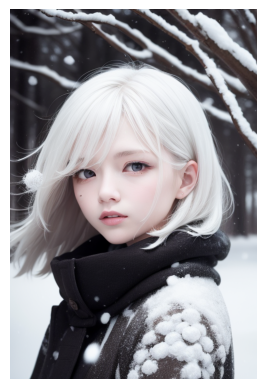

In [ ]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [ ]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/RD_Radio31_000.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/full3.png
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:00<00:00, 15.01it/s]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00, 24.17it/s]
mel:: 100% 200/200 [00:00<00:00, 26313.90it/s]
audio2exp:: 100% 20/20 [00:00<00:00, 156.58it/s]
Face Renderer:: 100% 100/100 [00:55<00:00,  1.81it/s]
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (256, 259) to (256, 272) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
The generated video is named ./results/2025_11_02_04.01.47/full3##RD_Radio31_000.mp4
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
seamlessClone:: 100% 200/200 [00:33<00:00,  5.90it/s]
The generated video is

In [ ]:
try:
    import facexlib
    print("facexlib is installed and can be imported.")
except ModuleNotFoundError:
    print("facexlib is NOT installed or cannot be imported.")

facexlib is NOT installed or cannot be imported.


In [ ]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2025_11_02_04.01.47.mp4
